In [38]:
import tensorflow as tf
print(tf.__version__)

2.8.2


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [40]:
# Build the Sequential feedforward neural network model


# model = Sequential([
#     Flatten(input_shape=(28, 28)),
#     Dense(16, activation='relu'),
#     Dense(16, activation='relu'),
#     Dense(10, activation='softmax')
    
# ])

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(16, activation='relu'),
    Dense(16, activation='relu', name="layer_1"),
    Dense(10, activation='softmax')    
])

In [41]:
# Print the model summary
# model.weights
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 16)                12560     
                                                                 
 layer_1 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [43]:
# Build the Sequential convolutional neural network model
# model = Sequential([
#     Conv2D(16, (3, 3), activation='relu', input_shape=(32,32,3)),
#     MaxPooling2D((3,3)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

model = Sequential([
    # Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(16, (3, 3), activation='relu', padding="same", strides=2, input_shape=(28, 28, 1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

In [44]:
# Print the model summary
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [45]:
# Define the model optimizer, loss function and metrics

# simple method
model.compile(
    optimizer='sgd', # 'adam', 'rmsprop', 'adadelta'
    loss='sparse_categorical_crossentropy', # 'mean_squared_error, 'categorical_crossentropy']
    metrics=['accuracy', 'mae']
)

# object calling method
# model.compile(
#     tf.keras.optimizers.SGD(), # 'adam', 'rmsprop', 'adadelta'
#     tf.keras.losses.BinaryCrossentropy(), # 'mean_squared_error, 'categorical_crossentropy'
#     metrics=[tf.keras.metrics.BinaryCrossentropy(), tf.keras.metrics.MeanAbsoluteError()]
# )


In [46]:
# Print the resulting model attributes

print(model.loss)
print('---------')
print(model.optimizer)
print('---------')
print(model.compiled_metrics._metrics)
print('---------')
print(model.summary())


sparse_categorical_crossentropy
---------
---------
['accuracy', 'mae']
---------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 2,730
Trainable params: 2,730
Non-trainable params: 0
_________________________________________________________________
None


***
<a id="coding_tutorial_4"></a>
## The fit method

In [47]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [48]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [49]:
# Print the shape of the training data
tf.shape(train_images)
tf.shape(train_labels)

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([60000], dtype=int32)>

In [50]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[0])

9


In [51]:
# Rescale the image values so that they lie in between 0 and 1.
print(f"original format: {train_images[0]}")
train_images = tf.keras.utils.normalize(train_images)
print(f"normalizes images: {train_images[0]}")

original format: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

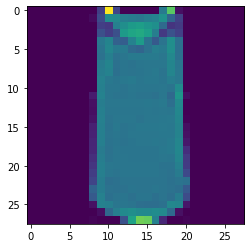

image label: T-shirt/top


In [52]:
# Display one of the images
i = 2
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"image label: {labels[train_labels[i]]}")


#### Fit the model

In [53]:
# Fit the model
history = model.fit(x=train_images,
          y=train_labels,
          epochs=10,
          batch_size=16)


Epoch 1/10
3750/3750 [==============================] - 14s 4ms/step - loss: 1.3042 - accuracy: 0.5753 - mae: 4.4200
Epoch 2/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.6991 - accuracy: 0.7505 - mae: 4.4200
Epoch 3/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6013 - accuracy: 0.7798 - mae: 4.4200
Epoch 4/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5570 - accuracy: 0.7941 - mae: 4.4200
Epoch 5/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5310 - accuracy: 0.8033 - mae: 4.4200
Epoch 6/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5146 - accuracy: 0.8108 - mae: 4.4200
Epoch 7/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.5019 - accuracy: 0.8145 - mae: 4.4200
Epoch 8/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.4928 - accuracy: 0.8179 - mae: 4.4199
Epoch 9/10
3750/3750 [==============================] - 9s 2ms/step - 

#### Plot training history

In [62]:
# Load the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head()


,loss,accuracy,mae
0,1.304213,0.575267,4.419956
1,0.699122,0.750500,4.419950
2,0.601331,0.779833,4.419951
3,0.557031,0.794083,4.419951
4,0.531009,0.803283,4.419951


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

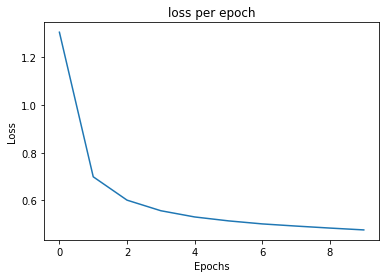

In [63]:
# Make a plot for the loss
loss_plot = df.plot(y="loss", title="loss per epoch", legend=False)
loss_plot.set(xlabel="Epochs", ylabel="Loss")


[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

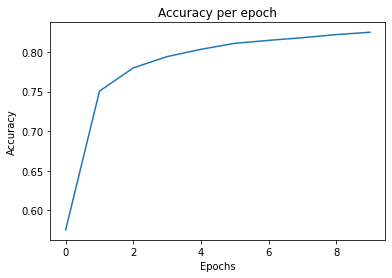

In [65]:
# Make a plot for the accuracy
acc_plot = df.plot(y="accuracy", title="Accuracy per epoch", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")



[Text(0, 0.5, 'MAE'), Text(0.5, 0, 'Epochs')]

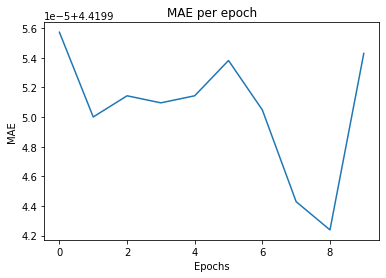

In [66]:
# Make a plot for the additional metric
mae_plot = df.plot(y="mae", title="MAE per epoch", legend=False)
mae_plot.set(xlabel="Epochs", ylabel="MAE")


***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [58]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [68]:
# Evaluate the model
model.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 785.4628 - accuracy: 0.4838 - mae: 4.4200


[785.4628295898438, 0.4837999939918518, 4.419997215270996]

#### Make predictions from the model

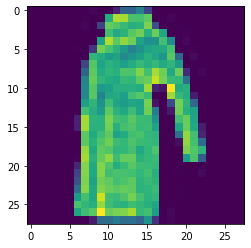

Label: Coat


In [69]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [76]:
# Get the model predictions
preds = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"highest predicted label class: {labels[np.argmax(preds)]}")



highest predicted label class: Coat
